# Практическое задание

## Задача 1

- Сформировать с помощью `sklearn.make_classification` датасет
из 1000 объектов с двумя признаками
- Обучить случайный лес из 1, 3, 10 и 50, 100, 200 деревьев
- Визуализировать разделяющие гиперплоскости на графиках
(по подобию визуализации деревьев из предыдущего урока,
необходимо только заменить вызов функции `predict` на `tree_vote`)
- Сделать выводы о получаемой сложности гиперплоскости и
недообучении или переобучении случайного леса
в зависимости от количества деревьев в нем

## Решение

### Выводы

- При увеличении числа деревьев возрастает качество предсказаний,
выходя на постоянный уровень
- При этом точность предсказаний на тестовой выборке не достигает 100 процентов,
что свидетельствует о не переобучении
- В то же время сохранятся многосвязность гиперповерхности,
как результат обработки выбросов и элемент переобучения

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from matplotlib.colors import ListedColormap

from example_1 import random_forest, tree_vote
from problem_1 import uniform_split, error_matrix, error_metrics

### Set parameters

In [2]:
tree_numbers = (1, 3, 10, 50, 100, 200)
grid_size = (100, 100)

dataset_parameters = {
    'n_samples': 1000,
    'n_features': 2,
    'n_informative': 2,
    'n_redundant': 0,
    'n_repeated': 0,
    'n_classes': 2,
    'n_clusters_per_class': 2,
    'random_state': 1
}

split_parameters = {
    'test_size': 0.25,
    'random_state': 1
}

uniform_split_parameters = {'size': grid_size}

#### Plot parameters

In [3]:
subset_labels = {
    0: 'train',
    1: 'test'
}

metric_labels = {
    0: 'accuracy',
    1: 'precision',
    2: 'recall',
    3: 'f-score'
}

colormap_parameters = {
    'base': ('red', 'blue'),
    'light': ('lightcoral', 'lightblue')
}

colormaps = {
    key: ListedColormap(value)
    for key, value in colormap_parameters.items()
}

### Make dataset

In [4]:
X, y = make_classification(**dataset_parameters)

#### Plot dataset

In [5]:
feature_indexes = 0, 1

scatter_data = {
    'x': X[:, feature_indexes[0]],
    'y': X[:, feature_indexes[1]], 
    'c': y
}
scatter_parameters ={'cmap': colormaps['base']}

subplots_parameters = {'figsize': (8, 8)}
axis_parameters = {
    'xlabel': f'feature {feature_indexes[0]}',
    'ylabel': f'feature {feature_indexes[1]}'
}
legend_parameters = {
    # 'loc': "upper right",
    'title':  'classes'
}

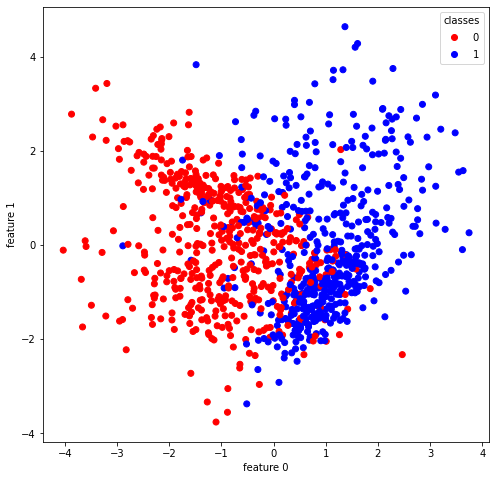

In [6]:
figure, axis = plt.subplots(**subplots_parameters)

scatter = axis.scatter(
    **scatter_data,
    **scatter_parameters
)

# legend = axis.legend(
#     *scatter.legend_elements(),
#     **legend_parameters
# )
# axis.add_artist(legend)

axis.legend(
    *scatter.legend_elements(),
    **legend_parameters
)
axis.set(**axis_parameters)

plt.show()

### Split dataset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    **split_parameters
)

In [8]:
X_grid = uniform_split(
    X,
    **uniform_split_parameters
)

In [9]:
X_sets = X_train, X_test, X_grid
y_sets = y_train, y_test

#### Plot subsets

In [10]:
feature_indexes = 0, 1

scatter_parameters_sets = [
    {'cmap': colormaps['light']},
    {'cmap': colormaps['base']}
]

subplots_parameters = {'figsize': (8, 8)}
axis_parameters = {
    'xlabel': f'feature {feature_indexes[0]}',
    'ylabel': f'feature {feature_indexes[1]}'
}
legend_parameters = {'title':  'classes'}

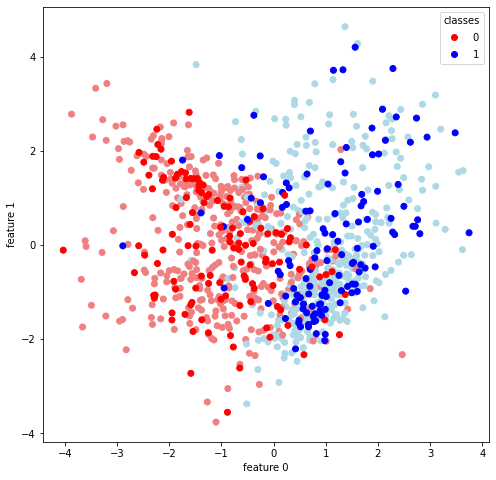

In [11]:
figure, axis = plt.subplots(**subplots_parameters)

for i in range(len(y_sets)):
    scatter_data = {
        'x': X_sets[i][ :, feature_indexes[0]],
        'y': X_sets[i][ :, feature_indexes[1]], 
        'c': y_sets[i]
    }
    scatter = axis.scatter(
        **scatter_data,
        **scatter_parameters_sets[i]
    )
    axis.legend(
        *scatter.legend_elements(),
        **legend_parameters
    )

axis.set(**axis_parameters)    

plt.show()

### Make forests

In [12]:
forests = [
    random_forest(X_train, y_train, tree_number)
    for tree_number in tree_numbers
]

### Make predictions

In [13]:
a__sets = [
    [
        tree_vote(forest, X)
        for forest in forests
    ]
    for X in X_sets
]

### Calculate metrics

In [14]:
metrics__sets = [
    [
        error_metrics(error_matrix(a, y))
        for a in a_sets
    ]
    for a_sets, y in zip(a__sets[:len(y_sets)], y_sets)
]

#### Plot metrics

In [15]:
column_number = 2
row_number = int(len(metrics__sets[0][0]) / column_number)

plot_parameters = ['o--']

subplos_parameters = {
    'nrows': row_number,
    'ncols': column_number,
    'sharex': True,
    'constrained_layout': True,
    'figsize': (5 * column_number, 4 * row_number)
}
figure_parameters = {'supxlabel': 'number of trees'}
axis_parameters = {'xticks': tree_numbers}
legend_parameters = {'title':  'subsets'}

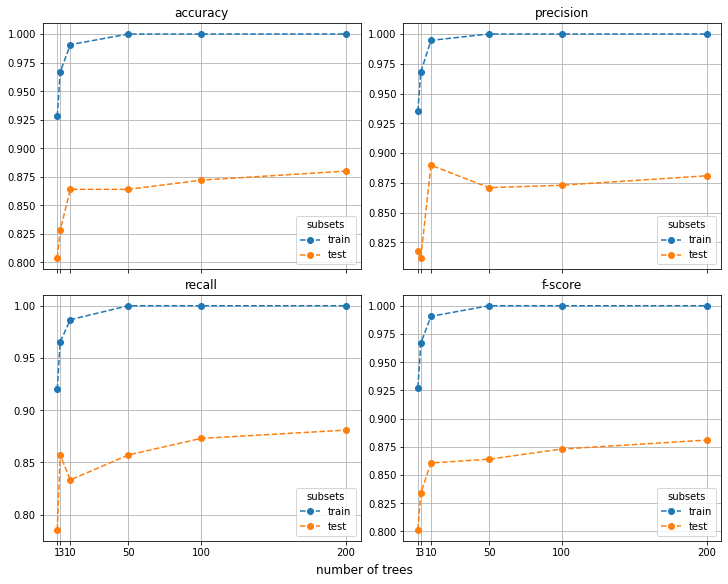

In [16]:
figure, axes = plt.subplots(**subplos_parameters)

for k in range(len(metrics__sets[0][0])):
    axis = axes.flat[k]
    for i in range(len(y_sets)):
        plot_data = [
            tree_numbers,
            np.array(metrics__sets[i])[:, k]
        ]
        axis.plot(
            *plot_data,
            *plot_parameters,
            label=subset_labels[i]
        )

    axis.legend(**legend_parameters)
    axis.set(
        title = metric_labels[k],
        **axis_parameters        
    )
    axis.grid()
    
figure.supxlabel(figure_parameters['supxlabel'])
plt.show()

#### Plot hyperplanes

In [17]:
feature_indexes = 0, 1
metric_index = 3

row_number = len(tree_numbers)
column_number = len(y_sets)

scatter_parameters = {'cmap': colormaps['base']}
pcolormesh_parameters = {
    'cmap': colormaps['light'],
    'shading': 'auto'    
}

subplots_parameters = {
    'nrows': row_number,
    'ncols': column_number,
    'sharex': True,
    'sharey': True,
    'constrained_layout': True,
    'figsize': (5 * column_number, 5 * row_number)
}
figure_parameters = {
    'supxlabel': f'feature {feature_indexes[0]}',
    'supylabel': f'feature {feature_indexes[1]}'   
}
legend_parameters = {'title':  'classes'}

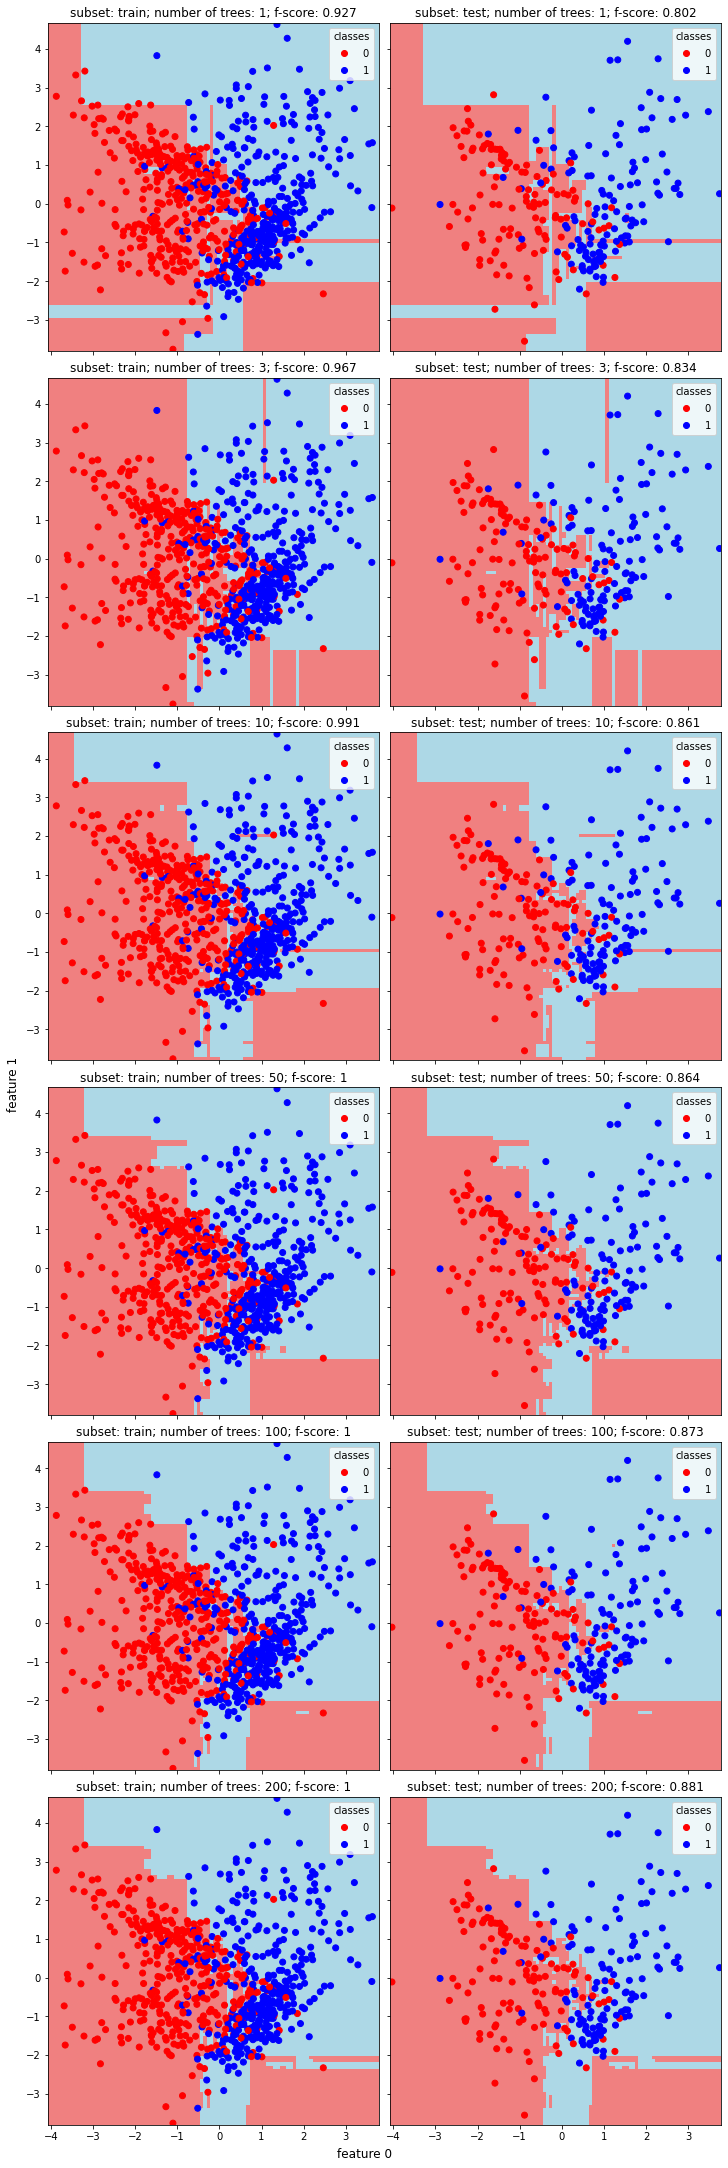

In [18]:
figure, axes = plt.subplots(**subplots_parameters)

for j in range(len(tree_numbers)):
    for i in range(len(y_sets)):
        axis = axes[j, i]
        axis.set(
            title='subset: {}; number of trees: {}; {}: {:.3g}'.format(
                subset_labels[i],
                tree_numbers[j],
                metric_labels[metric_index],
                metrics__sets[i][j][metric_index]
            )
        )
        
        pcolormesh_data = [
            _.reshape(grid_size)
            for _ in (
                *X_sets[-1].transpose(),
                np.array(a__sets[-1][j])
            )
        ]
        axis.pcolormesh(
            *pcolormesh_data,
            **pcolormesh_parameters
        )

        scatter_data = {
            'x': X_sets[i][ :, feature_indexes[0]],
            'y': X_sets[i][ :, feature_indexes[1]],
            'c': y_sets[i]
        }
        scatter=axis.scatter(
            **scatter_data,
            **scatter_parameters
        )
        
        axis.legend(
            *scatter.legend_elements(),
            **legend_parameters
        )
        
figure.supxlabel(figure_parameters['supxlabel'])
figure.supylabel(figure_parameters['supylabel'])

plt.show()